# COMP 6934 - Assignment 1
- Professor:       Terrence Tricco
- Term:            Winter 2024
- Student Name:    **Daniel Wiredu**
- Student User:    **dbwiredu**
- Student Email:   dbwiredu@mun.ca
- Student ID:      **202286594**

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#create dataframe / import data
df_plastic_production = pd.read_csv('plastic-production.csv')

In [3]:
#checking for null values
df_plastic_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Applications  420 non-null    object 
 1   Time          420 non-null    int64  
 2   Value         420 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.0+ KB


## Question 1:

___

In [4]:
# Using pandas groupby() to calculate the sum of plastic production from all sectors on a yearly basis
yearly_production = df_plastic_production[['Time','Value']].groupby(by='Time').sum()
yearly_production

,Value
Time,
1990,259.776
1991,269.740
1992,287.139
1993,299.370
1994,328.894
1995,341.835
1996,366.879
1997,394.456
1998,412.794


In [5]:
#Confirming that the calculated sums equal the total production for all years provided in the data set (within an absolute precision of 1e-3)
print('Calculated Yearly Sum = ', yearly_production['Value'].sum())
print('Total sum from dataset = ', df_plastic_production['Value'].sum())

if abs(yearly_production['Value'].sum() - df_plastic_production['Value'].sum()) < 1e-3:
    print('Calculated sums equals total production for all years in dataset')
else: 
    print('Calculated sums NOT equals total production for all years in dataset')

Calculated Yearly Sum =  17202.661
Total sum from dataset =  17202.661
Calculated sums equals total production for all years in dataset


### References
- Float Comparison: https://www.quora.com/What-is-the-best-way-to-compare-two-floats-without-loss-of-precision

## Question 2:

___

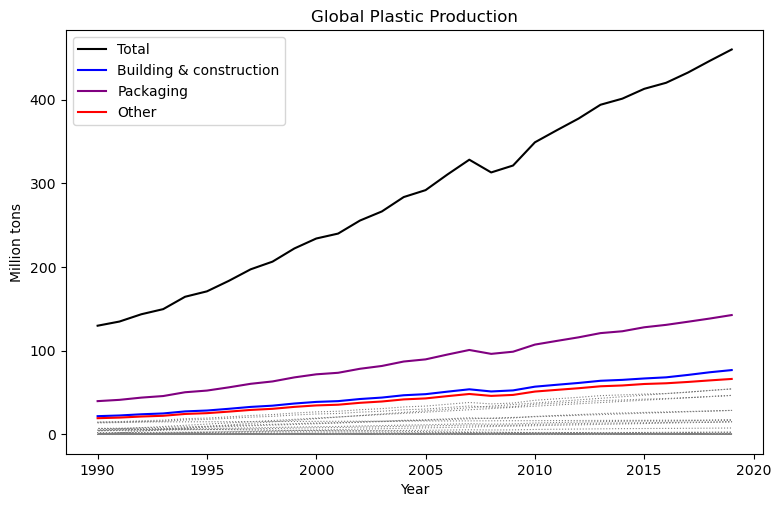

In [6]:
#create plot figure and adjust size
plt.figure(figsize=(9,5.5))

#create new dataframe for the labeled sectors from the plastic production dataframe from Q1 above
df_labeled = df_plastic_production.sort_values(by='Time')

#create x-axis and y-axis and plot line for each of the labeled sectors
x_total = df_labeled[df_labeled['Applications'] == 'Total']['Time']
y_total = df_labeled[df_labeled['Applications'] == 'Total']['Value']
plt.plot(x_total,y_total,label='Total', color='black')

x_build_construct = df_labeled[df_labeled['Applications'] == 'Building & construction']['Time']
y_build_construct = df_labeled[df_labeled['Applications'] == 'Building & construction']['Value']
plt.plot(x_build_construct,y_build_construct,label='Building & construction',color='blue')

x_packaging = df_labeled[df_labeled['Applications'] == 'Packaging']['Time']
y_packaging = df_labeled[df_labeled['Applications'] == 'Packaging']['Value']
plt.plot(x_packaging,y_packaging,label='Packaging',color='purple')

x_other = df_labeled[df_labeled['Applications'] == 'Other']['Time']
y_other = df_labeled[df_labeled['Applications'] == 'Other']['Value']
plt.plot(x_other,y_other,label='Other',color='red')

#create a new dataframe from the plastic production dataframe for the remaining unlabeled sectors
df_unlabeled_sectors = df_plastic_production[(df_plastic_production['Applications'] != 'Total') & (df_plastic_production['Applications'] != 'Building & construction') & (df_plastic_production['Applications'] != 'Packaging') & (df_plastic_production['Applications'] != 'Other')].sort_index()
x_applications = df_unlabeled_sectors['Time']
y_applications = df_unlabeled_sectors['Value']
plt.plot(x_applications,y_applications,color='grey',linestyle=':',linewidth=0.8)

#add axes labels, title and legend
plt.xlabel('Year')
plt.ylabel('Million tons')
plt.title('Global Plastic Production')
plt.legend(loc='upper left')

## Question 3:

___

In [7]:
#load data from file
df_river_plastics = pd.read_csv('river-plastics.csv')

In [8]:
#check loaded data
df_river_plastics.head()

,Country or administrative area,Area,Coast length,Rainfall,MPW,ME,Ratio ME/MPW
0,Albania,28486,362,1117,69833,1565,2.24
1,Algeria,2316559,998,80,764578,5774,0.76
2,Angola,1247357,1600,1025,236946,860,0.36
3,Antigua and Barbuda,443,153,996,627,2,0.29
4,Argentina,2779705,4989,567,465808,4137,0.89


In [9]:
#checking for null values and other helpful info
df_river_plastics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country or administrative area  163 non-null    object 
 1   Area                            163 non-null    int64  
 2   Coast length                    163 non-null    int64  
 3   Rainfall                        163 non-null    int64  
 4   MPW                             163 non-null    int64  
 5   ME                              163 non-null    int64  
 6   Ratio ME/MPW                    163 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 9.0+ KB


In [10]:
#create ratio of coastal length to land area and add as a new column to dataframe
df_river_plastics['Ratio_CL_Area'] = df_river_plastics['Coast length']/df_river_plastics['Area']
df_river_plastics

,Country or administrative area,Area,Coast length,Rainfall,MPW,ME,Ratio ME/MPW,Ratio_CL_Area
0,Albania,28486,362,1117,69833,1565,2.24,0.012708
1,Algeria,2316559,998,80,764578,5774,0.76,0.000431
2,Angola,1247357,1600,1025,236946,860,0.36,0.001283
3,Antigua and Barbuda,443,153,996,627,2,0.29,0.345372
4,Argentina,2779705,4989,567,465808,4137,0.89,0.001795
...,...,...,...,...,...,...,...,...
158,Venezuela,912557,2800,1875,671431,5988,0.89,0.003068
159,Vietnam,327732,3444,1772,1112790,28221,2.54,0.010509
160,Western Sahara,266830,111,35,4114,38,0.91,0.000416
161,Yemen,419900,1906,112,291737,252,0.09,0.004539


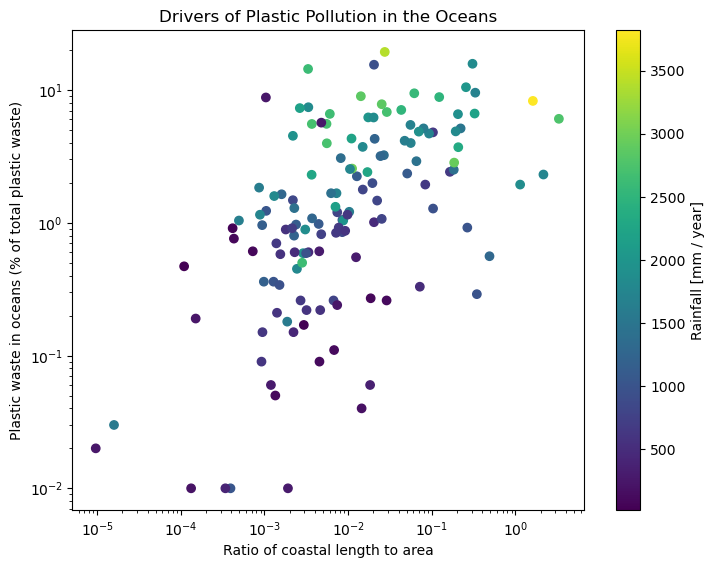

In [11]:
#create figure and axes objects
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, 1.0, 1.0])

#create x-axis and y-axis from dataframe
x = df_river_plastics['Ratio_CL_Area']
y = df_river_plastics['Ratio ME/MPW']

#color data points with Rainfall data
colors = df_river_plastics['Rainfall']
cticks = pd.Series(range(colors.min(),colors.max()+100,500)).tolist()

#create plot and label axes
ax.scatter(x, y, c=colors)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Ratio of coastal length to area')
ax.set_ylabel('Plastic waste in oceans (% of total plastic waste)')
ax.set_title('Drivers of Plastic Pollution in the Oceans')

# create Normalizer and ScalarMappable for colorbar
norm = plt.Normalize(cticks[0],cticks[-1]+300) 
sm = plt.cm.ScalarMappable(norm=norm, cmap='viridis')

#add colorbar to final figure
final_fig = fig.colorbar(sm, ax=ax, label='Rainfall [mm / year]')

final_fig

### References
- Log scale: https://stackoverflow.com/questions/773814/plot-logarithmic-axes
- Colorbar: https://stackoverflow.com/questions/43805821/matplotlib-add-colorbar-to-non-mappable-object
- Colorbar: https://jakevdp.github.io/PythonDataScienceHandbook/04.07-customizing-colorbars.html
- Colorbar: https://matplotlib.org/stable/api/colorbar_api.html